In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train (1).csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


## Frequent value imputation

In [5]:
# Using pandas

In [6]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<AxesSubplot:>

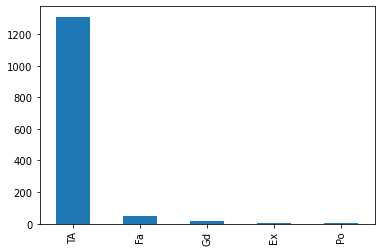

In [7]:
df['GarageQual'].value_counts().plot(kind='bar')

In [8]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'GarageQual')

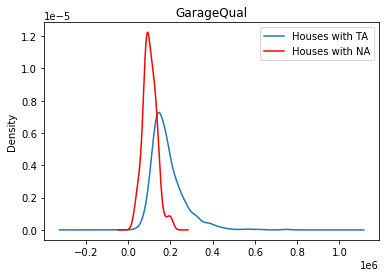

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

In [10]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [11]:
df['GarageQual'].fillna('TA',inplace=True)

In [12]:
df.fillna({'GarageQual':'TA'},inplace=True)

<AxesSubplot:>

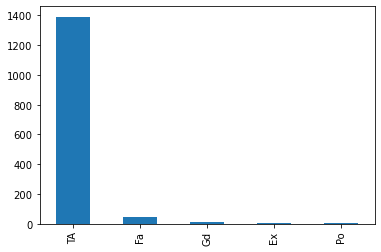

In [13]:
df['GarageQual'].value_counts().plot(kind='bar')

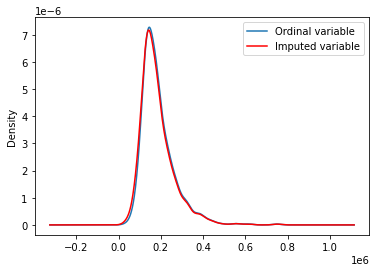

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Ordinal variable','Imputed variable']
ax.legend(lines,labels,loc='best')

<AxesSubplot:>

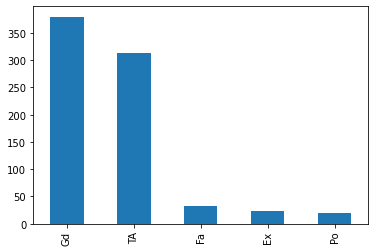

In [15]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [16]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

/tmp/ipykernel_6731/1980398898.py:9: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x740a4e149f30>, <matplotlib.lines.Line2D object at 0x740a4e170910>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax.legend(lines,labels,loc='best')
/tmp/ipykernel_6731/1980398898.py:9: UserWarning: Legend does not support ['SalePrice', 'SalePrice'] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax.legend(lines,labels,loc='best')


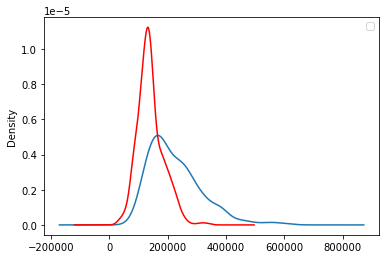

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines = ax.get_legend_handles_labels()
labels = ['Houses with Gd','Houses with NA']
ax.legend(lines,labels,loc='best')

In [18]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [19]:
df.fillna({'FireplaceQu':'Gd'},inplace=True)

<AxesSubplot:>

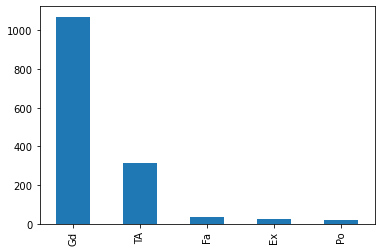

In [20]:
df['FireplaceQu'].value_counts().plot(kind='bar')

/tmp/ipykernel_6731/1048529649.py:9: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x740a4e00bcd0>, <matplotlib.lines.Line2D object at 0x740a4e032410>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax.legend(lines,labels,loc='best')
/tmp/ipykernel_6731/1048529649.py:9: UserWarning: Legend does not support ['SalePrice', 'SalePrice'] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax.legend(lines,labels,loc='best')


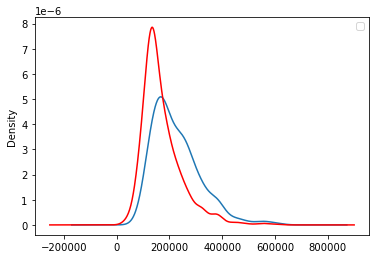

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines= ax.get_legend_handles_labels()
labels = ['Orignal variable','Imputed variable']
ax.legend(lines,labels,loc='best')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [23]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
imputer = SimpleImputer(strategy='most_frequent')

In [26]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [27]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

## Missing Category Imputation

In [28]:
newdf = pd.read_csv('train (1).csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [29]:
newdf

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [30]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [31]:
newdf.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

<AxesSubplot:>

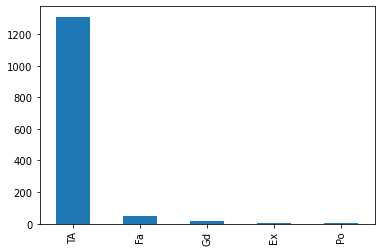

In [32]:
newdf['GarageQual'].value_counts().plot(kind='bar')

In [33]:
newdf.fillna({'GarageQual':'Missing'},inplace=True)

<AxesSubplot:>

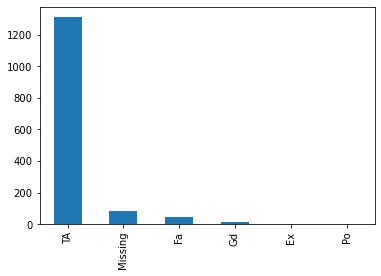

In [34]:
newdf['GarageQual'].value_counts().plot(kind='bar')

In [35]:
X = newdf.drop(columns=['SalePrice'])
y = newdf['SalePrice']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [39]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)